# Movie Data Analysis

Tyler Rollinson

## Goal

The goal of this project is to analyze the factors that affect the gross revenue of movies. The analysis is intended to highlight significant trends that can inform decision-making in movie production and marketing strategies.

In [40]:
#load libraries into enviroment
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

In [41]:
#loading the data
moviedata = ('MovieData1995_2024.csv')
df= pd.read_csv (moviedata)

In [42]:
#looking at the dataframe
df.head()

,Year,Rank,Movie,Release Date,Distributor,Genre,2024 Gross,Tickets Sold,Budget Gross
0,1995,1,Batman Forever,"Jun 16, 1995",Warner Bros.,Action,"$184,031,112.00","42,306,002","$100,000,000.00"
1,1995,2,Apollo 13,"Jun 30, 1995",Universal,Drama,"$172,036,360.00","39,548,588","$65,000,000.00"
2,1995,3,Toy Story,"Nov 22, 1995",Walt Disney,Adventure,"$150,004,917.00","34,483,888","$30,000,000.00"
3,1995,4,Pocahontas,"Jun 10, 1995",Walt Disney,Adventure,"$141,551,246.00","32,540,516","$55,000,000.00"
4,1995,5,Ace Ventura: When Nature Calls,"Nov 10, 1995",Warner Bros.,Comedy,"$104,371,496.00","23,993,447","$30,000,000.00"


## Data Cleaning

In [43]:
# Get the number of rows, and the number of columns 
df.shape

(18427, 9)

In [44]:
#looking for null or missing data
df.isnull().sum()

Year                0
Rank                0
Movie               0
Release Date       41
Distributor      1303
Genre            1178
2024 Gross          0
Tickets Sold        0
Budget Gross    12118
dtype: int64

In [45]:
#removing null values
df = df.dropna()

In [46]:
#checking if successful
df.isnull().sum()

Year            0
Rank            0
Movie           0
Release Date    0
Distributor     0
Genre           0
2024 Gross      0
Tickets Sold    0
Budget Gross    0
dtype: int64

In [47]:
#looking for duplicated rows
df.duplicated().sum()

0

In [48]:
# Get the number of rows, and the number of columns 
print(df.shape)

(5937, 9)


In [49]:
#looking at data types
print(df.dtypes)

Year             int64
Rank             int64
Movie           object
Release Date    object
Distributor     object
Genre           object
2024 Gross      object
Tickets Sold    object
Budget Gross    object
dtype: object


In [50]:
#dropping "Release Date" column. This will not be needed for my analyisis
df = df.drop('Release Date', axis=1)

In [51]:
#verifiying column was dropped
df.head()

,Year,Rank,Movie,Distributor,Genre,2024 Gross,Tickets Sold,Budget Gross
0,1995,1,Batman Forever,Warner Bros.,Action,"$184,031,112.00","42,306,002","$100,000,000.00"
1,1995,2,Apollo 13,Universal,Drama,"$172,036,360.00","39,548,588","$65,000,000.00"
2,1995,3,Toy Story,Walt Disney,Adventure,"$150,004,917.00","34,483,888","$30,000,000.00"
3,1995,4,Pocahontas,Walt Disney,Adventure,"$141,551,246.00","32,540,516","$55,000,000.00"
4,1995,5,Ace Ventura: When Nature Calls,Warner Bros.,Comedy,"$104,371,496.00","23,993,447","$30,000,000.00"


In [52]:
#viewing number of variations in each column
df.nunique()

Year              30
Rank             710
Movie           5353
Distributor      513
Genre             14
2024 Gross      5920
Tickets Sold    5873
Budget Gross     439
dtype: int64

In [53]:
# viewing list of unique objects for selected columns
columns_of_interest = ['Genre','Distributor',]
unique_items = {col: sorted(df[col].unique().tolist()) for col in columns_of_interest}

for col, items in unique_items.items():
    print(f"{col}:")
    for item in items:
        print(f"  - {item}")

Genre:
  - Action
  - Adventure
  - Black Comedy
  - Comedy
  - Concert/Perfor…
  - Documentary
  - Drama
  - Horror
  - Multiple Genres
  - Musical
  - Reality
  - Romantic Comedy
  - Thriller/Suspense
  - Western
Distributor:
  - 101 Studios
  - 1091 Media
  - 20th Century Fox
  - 20th Century Studios
  - 26 Aries
  - 3D Entertainment
  - 41 Inc.
  - 518 Media
  - 7-57 Releasing
  - 7th Empire Media
  - A Slice of Pie Pr…
  - A24
  - ABCKO Films
  - ABS-CBN
  - APD/Cinema Conser…
  - ARC Entertainment
  - ATO Pictures
  - Abkco Films
  - Abramorama Films
  - Academy Entertain…
  - Acorn TV
  - AdLab Films
  - Alchemy
  - Alive Mind
  - Alliance Atlantis
  - Alliance Vivafilm
  - Aloha Releasing
  - Altered Innocence
  - Amazon MGM Studios
  - Amazon Studios
  - Amazon Studios/Ro…
  - America Saga Rele…
  - American World Pi…
  - Amplify
  - Anchor Bay Entert…
  - Anchor Bay/Freestyle
  - Annapurna Pictures
  - Apparition
  - Archway Pictures
  - Area 23a
  - Arenas Entertainment
  - 

In [54]:
#viewing sum of rows labeled "Multiple Genres" under Genre column
print((df['Genre'] == 'Multiple Genres').sum())

21


In [55]:
#dropping rows labled "Multiple Genres"
df = df[df['Genre'] != 'Multiple Genres']

In [56]:
#verifying rows were dropped
print((df['Genre'] == 'Multiple Genres').sum())

0


In [57]:
#correcting column name for Gross revenue
df.rename(columns={'2024 Gross': 'Gross'}, inplace=True)

In [58]:
df.head()

,Year,Rank,Movie,Distributor,Genre,Gross,Tickets Sold,Budget Gross
0,1995,1,Batman Forever,Warner Bros.,Action,"$184,031,112.00","42,306,002","$100,000,000.00"
1,1995,2,Apollo 13,Universal,Drama,"$172,036,360.00","39,548,588","$65,000,000.00"
2,1995,3,Toy Story,Walt Disney,Adventure,"$150,004,917.00","34,483,888","$30,000,000.00"
3,1995,4,Pocahontas,Walt Disney,Adventure,"$141,551,246.00","32,540,516","$55,000,000.00"
4,1995,5,Ace Ventura: When Nature Calls,Warner Bros.,Comedy,"$104,371,496.00","23,993,447","$30,000,000.00"


In [59]:
#remove special characters from Gross, Tickets Sold, and Budget Gross
def clean_and_convert(column):
    return column.replace({'\$': '', ',': ''}, regex=True).astype(float)

df['Gross'] = clean_and_convert(df['Gross'])
df['Tickets Sold'] = clean_and_convert(df['Tickets Sold'])
df['Budget Gross'] = clean_and_convert(df['Budget Gross'])

df.head()

,Year,Rank,Movie,Distributor,Genre,Gross,Tickets Sold,Budget Gross
0,1995,1,Batman Forever,Warner Bros.,Action,184031112.0,42306002.0,100000000.0
1,1995,2,Apollo 13,Universal,Drama,172036360.0,39548588.0,65000000.0
2,1995,3,Toy Story,Walt Disney,Adventure,150004917.0,34483888.0,30000000.0
3,1995,4,Pocahontas,Walt Disney,Adventure,141551246.0,32540516.0,55000000.0
4,1995,5,Ace Ventura: When Nature Calls,Warner Bros.,Comedy,104371496.0,23993447.0,30000000.0


In [60]:
#checking df type
print(df.dtypes)

Year              int64
Rank              int64
Movie            object
Distributor      object
Genre            object
Gross           float64
Tickets Sold    float64
Budget Gross    float64
dtype: object


In [61]:
category_mappings = {}

In [62]:
#Assigning numerical values to movie, distr., and genre
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        category_mappings[col_name] = dict(enumerate(df_numerized[col_name].cat.categories))
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Year,Rank,Movie,Distributor,Genre,Gross,Tickets Sold,Budget Gross
0,1995,1,455,481,0,184031112.0,42306002.0,100000000.0
1,1995,2,343,464,6,172036360.0,39548588.0,65000000.0
2,1995,3,4961,480,1,150004917.0,34483888.0,30000000.0
3,1995,4,3170,480,1,141551246.0,32540516.0,55000000.0
4,1995,5,176,481,3,104371496.0,23993447.0,30000000.0
...,...,...,...,...,...,...,...,...
18409,2024,334,4664,271,7,4974.0,461.0,79300000.0
18413,2024,338,2323,239,11,3317.0,307.0,258000000.0
18416,2024,341,3020,294,6,2854.0,264.0,200000000.0
18418,2024,343,4783,294,6,2588.0,240.0,139000000.0


In [63]:
print(df.dtypes)

Year              int64
Rank              int64
Movie             int16
Distributor       int16
Genre              int8
Gross           float64
Tickets Sold    float64
Budget Gross    float64
dtype: object


In [64]:
#order by Gross revenue in decending order. 
df.sort_values(by=['Gross'], inplace=False, ascending=False)

,Year,Rank,Movie,Distributor,Genre,Gross,Tickets Sold,Budget Gross
12435,2015,3,398,480,0,459005868.0,54449094.0,550000.0
13247,2016,2,3364,480,1,424987707.0,49131526.0,150000.0
17016,2022,4,397,3,0,401007908.0,38082422.0,4000000.0
5167,2005,1,3693,2,1,380270577.0,59324582.0,10000000.0
14057,2017,5,3666,417,0,334201140.0,37257652.0,13000000.0
...,...,...,...,...,...,...,...,...
9449,2010,685,2150,303,6,387.0,49.0,35000000.0
16597,2020,398,2500,122,6,267.0,29.0,20000000.0
8762,2009,695,3908,373,6,213.0,28.0,10000000.0
16600,2020,401,82,67,5,166.0,18.0,10700000.0


## Visualizing the data

In [65]:
#checking for outliers
df.boxplot(column=['Gross'])

<Axes: >

This box plot shows the distribution of gross revenue. The outliers are included as they represent legitimate measures of successful movies.

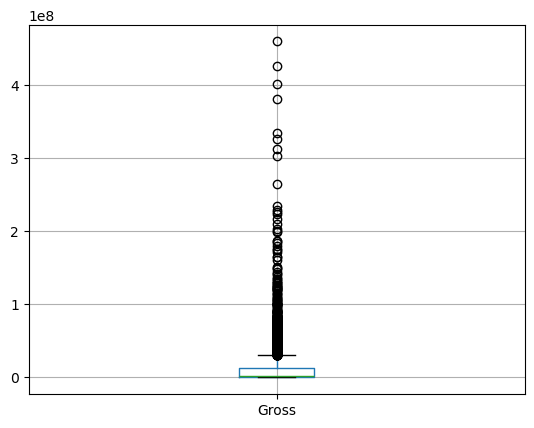

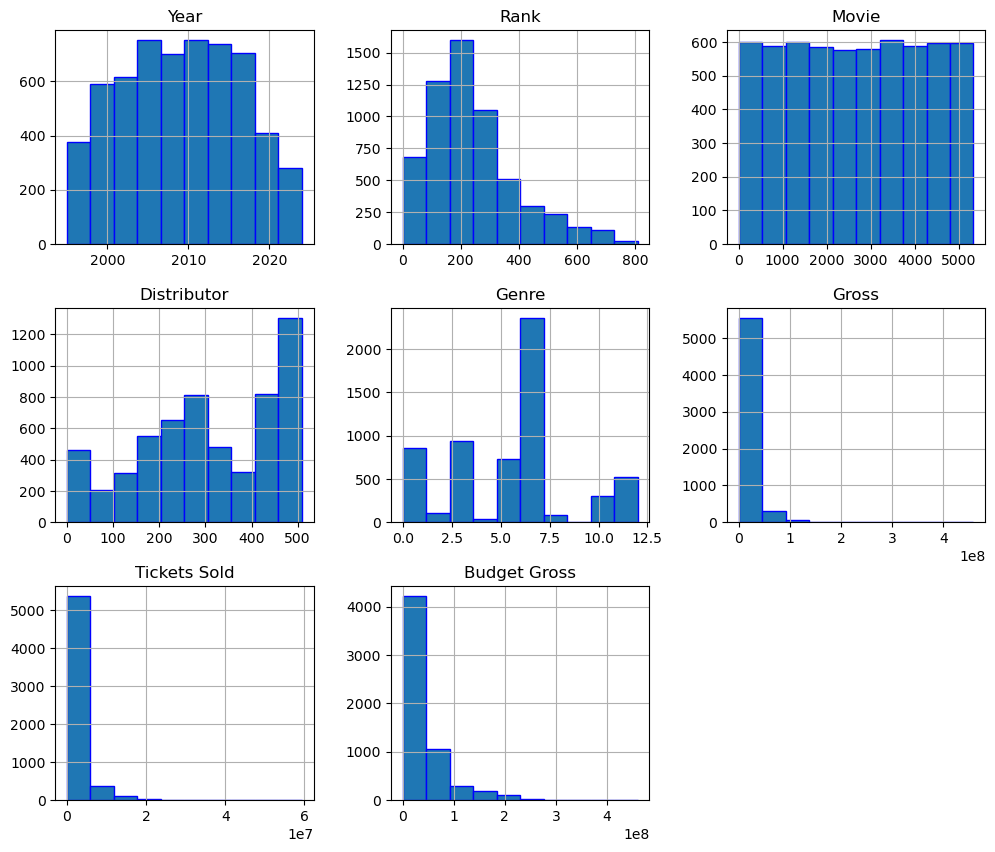

In [66]:
#looking at distribution 
import matplotlib.pyplot as plt

df.hist(edgecolor= 'blue',figsize=(12,10), bins= 10)
plt.show()

These histograms show the distribution of values for each variable.

Gross, Tickets Sold, and Budget Gross all show right-skewed distributions, indicating that while most movies fall into a lower range for these metrics, a few outliers exist with very high values.

Some distributors and genres appear more frequently than others, hinting at market dominance or popularity trends.

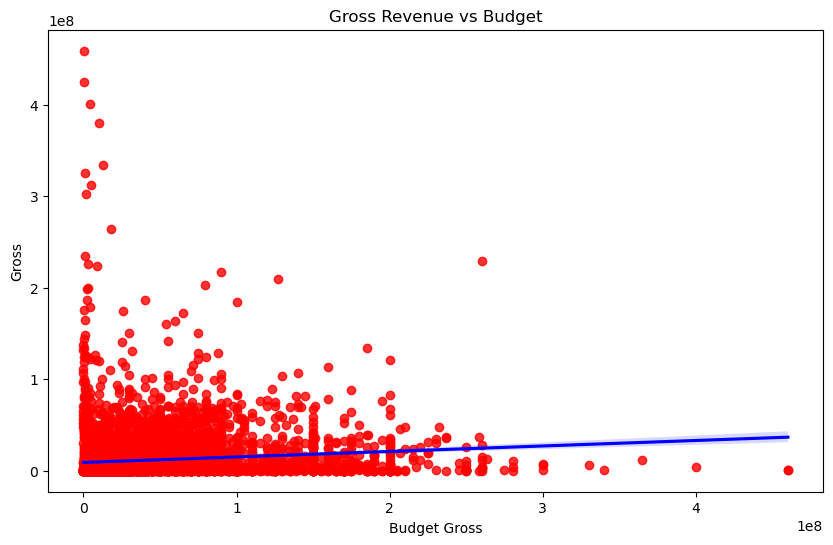

In [77]:
# Looking at correlation

plt.figure(figsize=(10, 6))
sns.regplot(x="Budget Gross", y="Gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"}).set_title('Gross Revenue vs Budget')
plt.show()

This scatter plot of Gross Revenue vs Budget shows us that a majority of the points are clustered at the lower end of both "Budget Gross" and "Gross" revenue, indicating that most movies have lower budgets and gross revenues. The regression line shows a slight positive slope, suggesting a weak positive correlation between "Budget Gross" and "Gross".

In [68]:
#looking at highest correlations 
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

#Filtering for correlations greater than 0.5.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

Gross         Tickets Sold    0.959044
Tickets Sold  Gross           0.959044
Year          Year            1.000000
Gross         Gross           1.000000
Genre         Genre           1.000000
Distributor   Distributor     1.000000
Movie         Movie           1.000000
Rank          Rank            1.000000
Tickets Sold  Tickets Sold    1.000000
Budget Gross  Budget Gross    1.000000
dtype: float64

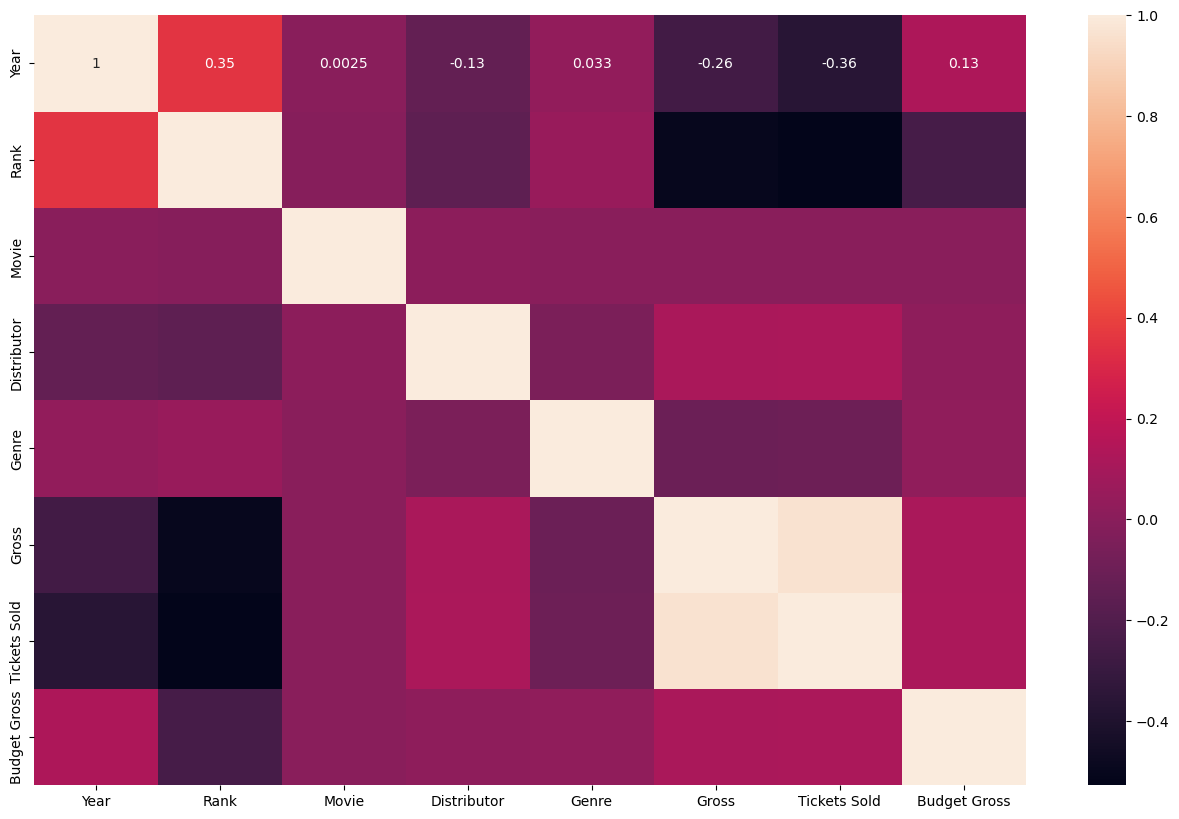

In [69]:
plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

The correlation chart and correlation matrix show us that Gross Revenue has a strong positive relationship with tickets sold - which makes sense! It also shows that there are weak positive relationships between Gross Revenue and Genre, Budget, and Year. However, these relationships are very weak a thus cannot explain Gross Revenue completely. 

In [70]:
#aggregate gross revenue by year
gross_revenue_by_year = df.groupby('Year')['Gross'].sum().reset_index()

In [71]:
#plotting gross revenue by year

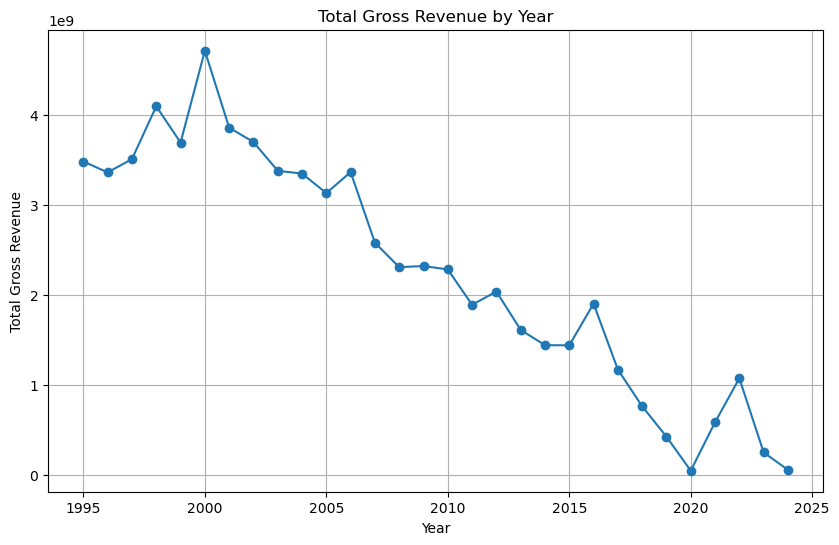

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(gross_revenue_by_year['Year'], gross_revenue_by_year['Gross'], marker='o')
plt.title('Total Gross Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue')
plt.grid(True)
plt.show()

In [73]:
#aggregate gross revenue by year
budget_by_year = df.groupby('Year')['Budget Gross'].sum().reset_index()

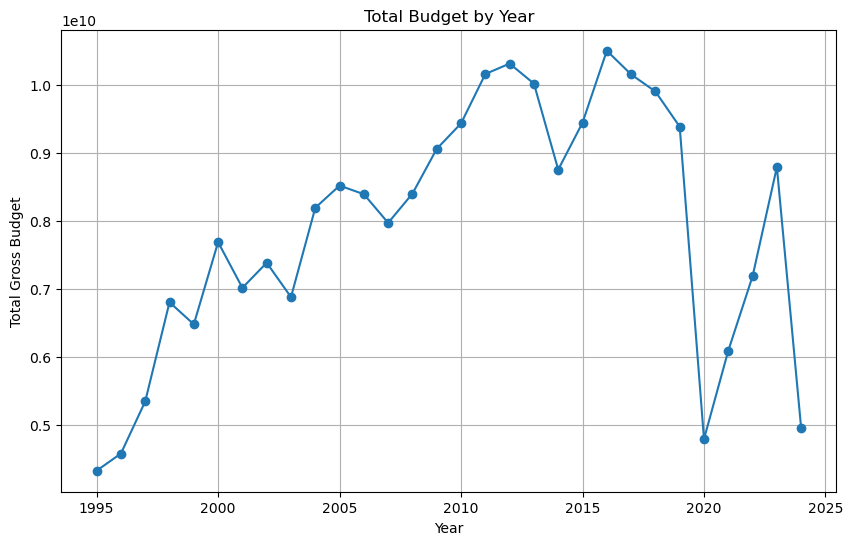

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(budget_by_year['Year'], budget_by_year['Budget Gross'], marker='o')
plt.title('Total Budget by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross Budget')
plt.grid(True)
plt.show()

The time series graphs above show us that there is a steady decline in total Gross Revenue and a steep rise in total Gross Budget overtime. In other terms movies are costing more to make and making less at the box office. The two significate dips in the graphs are for 2020 during the COVID social distancing lockdown. 

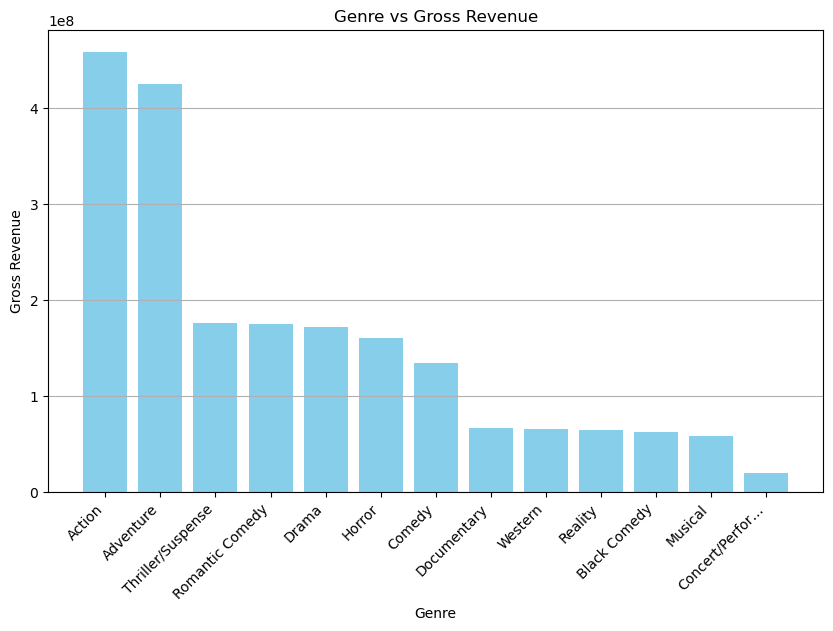

In [75]:
#charting movie genre with gross revenue
#pulling the original labels and sorting
sorted_df = df_numerized.sort_values(by='Gross', ascending=False)
sorted_labels = sorted_df['Genre'].map(category_mappings['Genre'])

#plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_labels, sorted_df['Gross'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Genre vs Gross Revenue')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.grid(axis='y')
plt.show()

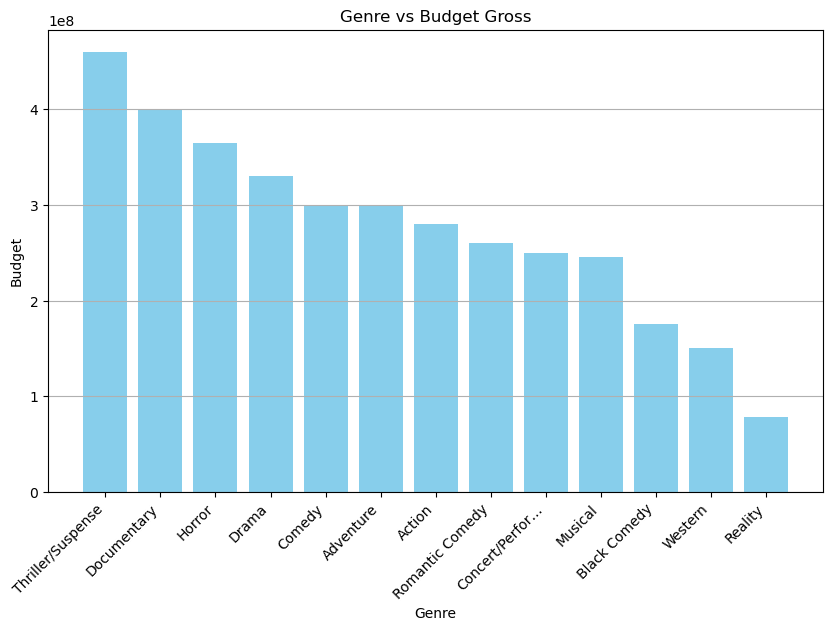

In [76]:
#charting movie genre with budget
#pulling the original labels and sorting
sorted_df = df_numerized.sort_values(by='Budget Gross', ascending=False)
sorted_labels = sorted_df['Genre'].map(category_mappings['Genre'])

#plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_labels, sorted_df['Budget Gross'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Genre vs Budget Gross')
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.grid(axis='y')
plt.show()

From the bar graphs we learn that the top grossing movie genres are Action and Adventure. The Genre with the highest budgets are Thriller, Suspense, Documentary, and Horror.

## Summary

The analysis shows us that on average there is a steady decline in total gross revenue over time and a steep increase in the total gross budget for movies. This data suggests that movies are becoming more expensive to produce and they are generating less revenue at the box office. We also can see a noticable dip during the COVID19 lockdowns and a steep recovery the following year. However, the Gross Revenue has not returned to preCOVID levels. From the data exploration we learn that the top grossing movie genres are Action & Adventure with the least profitable being conert movies (iteresting given The Eras Tour Live's success). We also learn that the genres with the highest average budgets are Thriller/Suspense, Documentary, and Horror with Action and Aventure sitting in the median of all genres. It is important to note that this analysis is based on a small dataset. For a more accurate and comprehensive understanding, a larger dataset should be analyzed. 